<a href="https://colab.research.google.com/github/MuGrahiman/ML-Transaction-Fraud-Detection/blob/main/FruadDetectionInTransaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
# Import All Modules
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

In [73]:
# Load Data Set
data=pd.read_csv("/content/sample_data/creditcard.csv")

In [74]:
# Print column names to verify 'Class' exists
print("Column names in dataset:")
print(data.columns)

Column names in dataset:
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [75]:

# Find the actual column name for 'Class'
class_column = [col for col in data.columns if "class" in col.lower()]


In [76]:

if not class_column:
    raise KeyError("Error: 'Class' column not found! Available columns: " + str(data.columns))


In [77]:

# Extract features and target variable
X = data.drop(columns=class_column)  # Drop 'Class' column dynamically
y = data[class_column[0]]  # Use the actual name found



In [78]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
print(y_train.isnull().sum())  # Count missing values in y_train
print(y_test.isnull().sum())   # Count missing values in y_test


0
0


In [80]:
X_train = X_train[~y_train.isna()]
y_train = y_train.dropna()


In [81]:
y_train.fillna(1, inplace=True)  # Assume missing values mean "Fraud"


In [82]:
print(y_train.dtype)


int64


In [83]:
y_train = y_train.astype(int)


In [84]:
print(y_train.isnull().sum())  # Count missing values in y_train
print(y_test.isnull().sum())   # Count missing values in y_test


0
0


In [85]:
# Train model

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

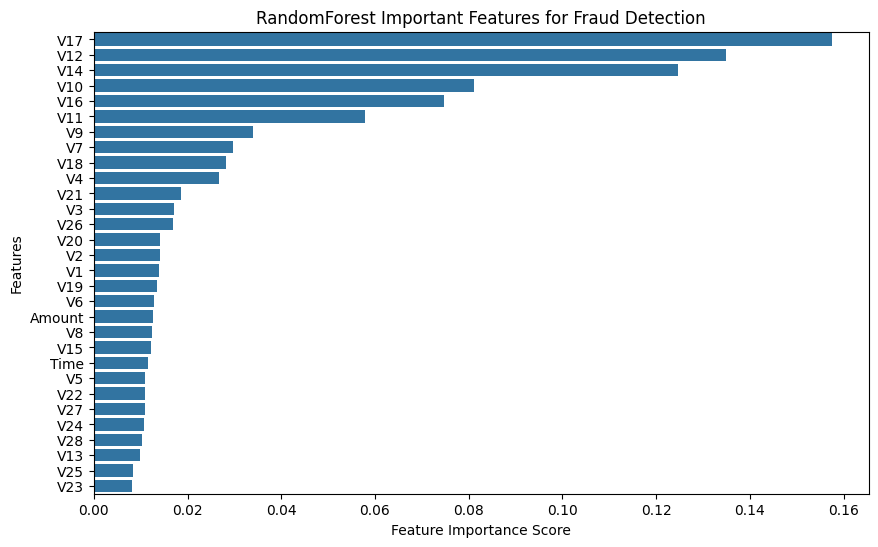

In [86]:
# Feature Importance for RandomForest
rf_feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_feature_importances, y=rf_feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('RandomForest Important Features for Fraud Detection')
plt.show()

In [87]:
# Model Training with GradientBoosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [88]:
gb_pred = gb_model.predict(X_test)


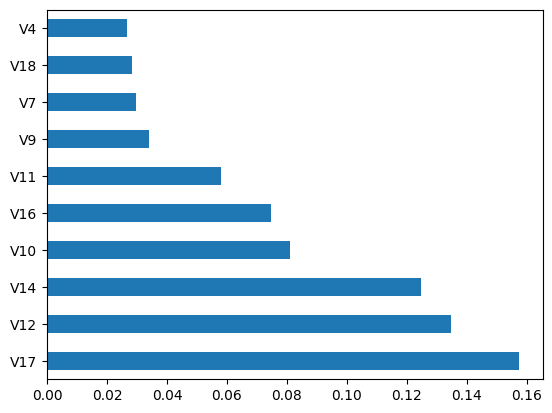

In [89]:
# Visualizing feature importance

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

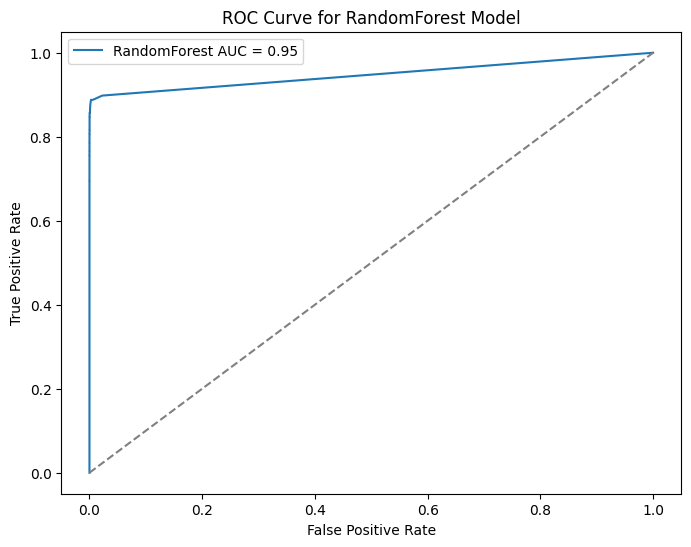

In [90]:

rf_probs = model.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'RandomForest AUC = {rf_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForest Model')
plt.legend()
plt.show()

In [91]:
# Model Evaluation for GradientBoosting
gb_accuracy = accuracy_score(y_test, gb_pred)
print(f'GradientBoosting Accuracy: {gb_accuracy:.2f}')
print('GradientBoosting Classification Report:\n', classification_report(y_test, gb_pred))
print('GradientBoosting Confusion Matrix:\n', confusion_matrix(y_test, gb_pred))

GradientBoosting Accuracy: 1.00
GradientBoosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.60      0.66        98

    accuracy                           1.00     56962
   macro avg       0.87      0.80      0.83     56962
weighted avg       1.00      1.00      1.00     56962

GradientBoosting Confusion Matrix:
 [[56843    21]
 [   39    59]]


In [92]:
# Make predictions
predictions = model.predict(X_test)


In [93]:
# Convert predictions to "Fraud" or "Not Fraud"
output = ["Fraud" if pred == 1 else "Not Fraud" for pred in predictions]



In [94]:
# Print results
for i, result in enumerate(output[:20]):  # Print first 20 predictions
    print(f"Transaction {i+1}: {result}")

Transaction 1: Fraud
Transaction 2: Not Fraud
Transaction 3: Not Fraud
Transaction 4: Not Fraud
Transaction 5: Not Fraud
Transaction 6: Not Fraud
Transaction 7: Not Fraud
Transaction 8: Not Fraud
Transaction 9: Not Fraud
Transaction 10: Not Fraud
Transaction 11: Not Fraud
Transaction 12: Not Fraud
Transaction 13: Not Fraud
Transaction 14: Not Fraud
Transaction 15: Not Fraud
Transaction 16: Not Fraud
Transaction 17: Not Fraud
Transaction 18: Not Fraud
Transaction 19: Not Fraud
Transaction 20: Not Fraud


In [95]:
# Count overall occurrences of "Fraud" and "Not Fraud"
fraud_count = output.count("Fraud")
not_fraud_count = output.count("Not Fraud")


In [96]:
# Print overall counts
print(f"\nOverall Results:")
print(f"Total Fraud Transactions: {fraud_count}")
print(f"Total Not Fraud Transactions: {not_fraud_count}")



Overall Results:
Total Fraud Transactions: 77
Total Not Fraud Transactions: 56885


In [97]:
# Evaluate model

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, predictions))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56862     2]
 [   23    75]]


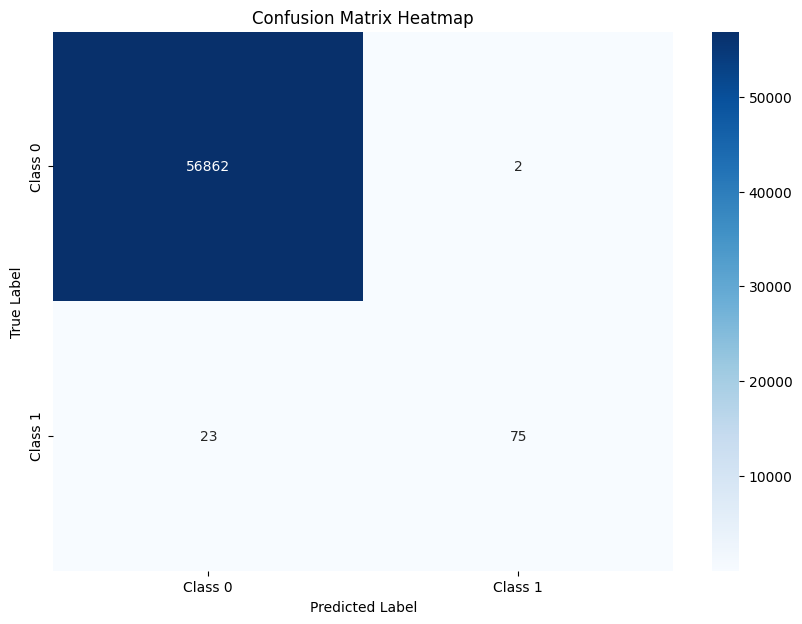

In [98]:

# Assuming y_test and predictions are already defined
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

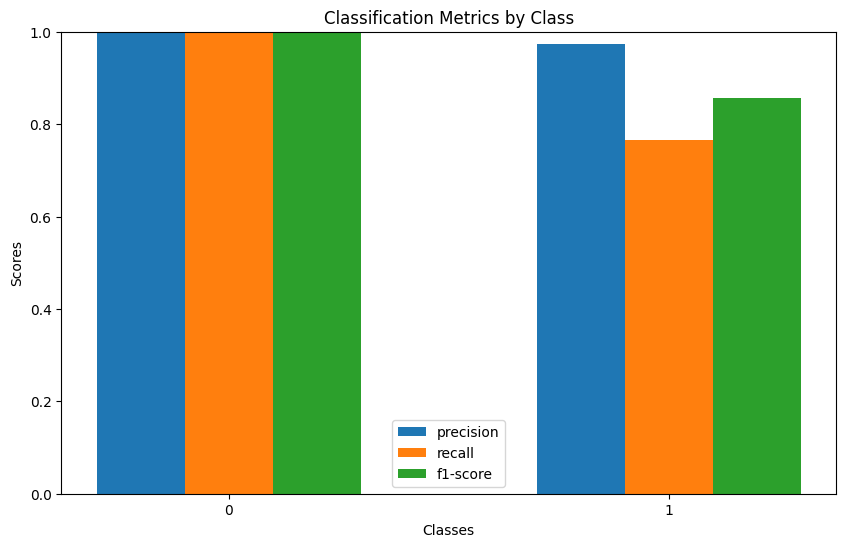

In [99]:

# Assuming y_test and predictions are already defined
report = classification_report(y_test, predictions, output_dict=True)

# Extract metrics
metrics = ['precision', 'recall', 'f1-score']
classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
values = {metric: [report[cls][metric] for cls in classes] for metric in metrics}

# Set up the bar diagram
x = np.arange(len(classes))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for each metric
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, values[metric], width, label=metric)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Classification Metrics by Class')
ax.set_xticks(x + width)
ax.set_xticklabels(classes)
ax.legend()

plt.ylim(0, 1)  # Set y-axis limits
plt.show()

In [100]:

# Data for the pie chart
labels = ['Fraud', 'Not Fraud']
sizes = [fraud_count, not_fraud_count]
colors = ['red', 'green']  # You can choose any colors you like
explode = (0.1, 0)  # explode the 1st slice (Fraud)


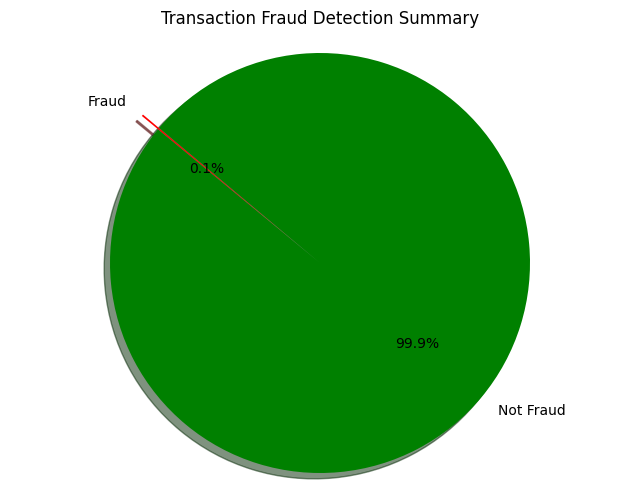

In [101]:
# Creating the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Transaction Fraud Detection Summary')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
# Show the pie chart
plt.show()

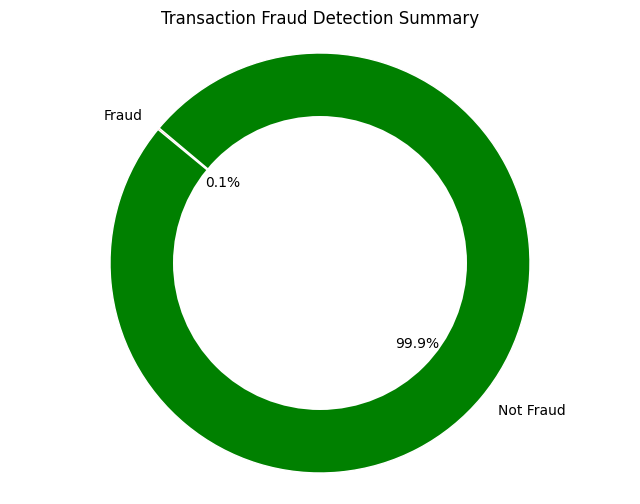

In [102]:
# Creating the donut chart
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))  # Equal aspect ratio ensures a circle

# Create the pie chart and add a hole in the center
wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors,
                                   autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='white'))

# Draw a circle at the center of pie to create the donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')  # 0.70 is the radius of the center circle
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie chart is a circle
ax.axis('equal')

# Title for the donut chart
plt.title('Transaction Fraud Detection Summary')

# Show the donut chart
plt.show()

In [103]:
# Save Model
import joblib
joblib.dump(model, 'fraud_detection_rf.pkl')
joblib.dump(gb_model, 'fraud_detection_gb.pkl')
print("Models saved successfully!")

Models saved successfully!
